In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


# Vedení tepla s variabilní konduktivitou a produkcí tepla
Pro případ variabilní konduktivity (konduktivita je funkce) má evoluční rovnice vedení tepla tvar:

\begin{equation}
\rho \cdot c \cdot \frac{{\partial T}}{{\partial t}} = \frac{{\partial}}{{\partial x}} \left( {\lambda  \cdot \frac{{\partial T}}{{\partial x}}} \right) + H
\end{equation}

Stav, kdy teplotní rozdíl mezi jednotlivými částmi tělesa se v čase nemění t.j.
$\frac{\partial T}{\partial t} = 0$, nazýváme stacionárním vedením tepla. Rovnice vedení tepla má tvar:

\begin{equation}
\frac{{\partial}}{{\partial x}}\left( {\lambda  \cdot \frac{{\partial T}}{{\partial x}}} \right) = - H
\end{equation}

Rovnice můžeme upravit pomocí pravidla o derivaci součinu funkcí do tvaru:

$$\rho  \cdot c \cdot \frac{{\partial T}}{{\partial t}} = \frac{{\partial \lambda }}{{\partial x}} \cdot \frac{{\partial T}}{{\partial x}} + \lambda  \cdot \frac{{{\partial ^2}T}}{{\partial {x^2}}} + H$$
resp.
$$\frac{{\partial \lambda }}{{\partial x}} \cdot \frac{{\partial T}}{{\partial x}} + \lambda  \cdot \frac{{{\partial ^2}T}}{{\partial {x^2}}} =  - H$$

Pro každý diskrétní bod (kromě okrajových podmínek) ${x_i}$ pro $i = 1 \ldots n-2$ pak platí:

$${\lambda _{i - 1}}{T_{{x_i} - \Delta x}} - \left( {{\lambda _{i - 1}} + {\lambda _i}} \right){T_{x_i}} + {\lambda _i}{T_{{x_i} + \Delta x}} =  - \Delta {x^2} \cdot \frac{{{H_{i-1}} + {H_i}}}{2}$$

V maticovém tvaru lze soustavu rovnic zapsat ${\bf{A}}x = b$ kde:

$$\bf{A} = \begin{vmatrix}
1&0&0&0&0&0\\
{{\lambda _0}}&{ - \left( {{\lambda _0} + {\lambda _1}} \right)}&{{\lambda _1}}&0&0&0\\
0&{{\lambda _1}}&{ - \left( {{\lambda _1} + {\lambda _2}} \right)}&{{\lambda _2}}&0&0\\
 \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0&0&0&{{\lambda _{n - 3}}}&{ - \left( {{\lambda _{n - 3}} + {\lambda _{n - 2}}} \right)}&{{\lambda _{n - 2}}}\\
0&0&0&0&{2 {\lambda _{n - 2}}}&{- 2 {\lambda _{n - 2}}}
\end{vmatrix}$$

a

$$b = \begin{vmatrix}
{{T_{def}}}\\
{ - \Delta {x^2} \cdot \frac{{{H_0} + {H_1}}}{2}}\\
{ - \Delta {x^2} \cdot \frac{{{H_1} + {H_2}}}{2}}\\
 \vdots \\
{ - \Delta {x^2} \cdot \frac{{{H_{n - 2}} + {H_{n - 1}}}}{2}}\\
{q \cdot 2 \Delta x - H_{n - 2} \cdot \Delta {x^2}}
\end{vmatrix}$$


In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

## Sestavení soustavy rovnic

In [3]:
n, tc, q = 100, 35000, -0.02

In [4]:
x = linspace(0, tc, n)  # pozice uzlu teploty
dx = tc / (n - 1)       # vzdalenost uzlu
xm = linspace(dx/2, tc - dx/2, n-1) # pozice uzlu pro konduktivitu a produkci

Konduktivita a produkce tepla jsou reprezentovány jako vektory diskrétních hodnot v bodech `xm`:

In [5]:
k = 2.5 * ones(n-1)
H = 1e-6 * ones(n-1)

In [6]:
# Sestaveni diagonal matice soustavy
kd = hstack((k[:-1], 2*k[-1], 0))
ku = hstack((0, 0, k[1:]))
km = hstack((1, -(k[:-1] + k[1:]),  -2*k[-1]))

In [7]:
# matice soustavy
A = spdiags([kd, km, ku], [-1, 0, 1], n, n, 'csr')
# vektor pravych stran
b = hstack((0, -(H[:-1] + H[1:])*dx**2/2, q*2*dx - H[-1]*dx**2))

řešení

In [8]:
t = spsolve(A, b)

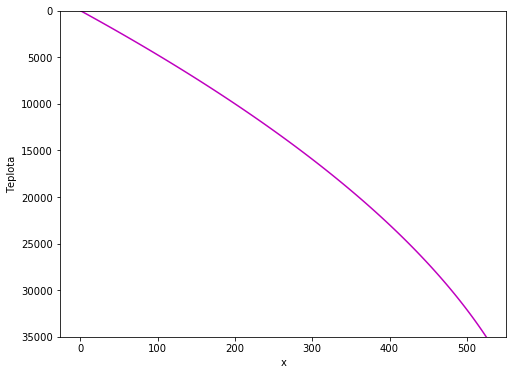

In [9]:
plot(t, x, 'm')
ylim(tc, 0)
xlabel('x')
ylabel('Teplota');

## Variabilní produkce tepla
Výpočet geotermy pro produkci tepla pouze ve svrchní kůře (15km)

In [10]:
H = zeros(n-1)
H[xm <= 15000] = 7e-6/3

In [11]:
b = hstack((0, -(H[:-1] + H[1:])*dx**2/2, q*2*dx - H[-1]*dx**2))

In [12]:
t = spsolve(A, b)

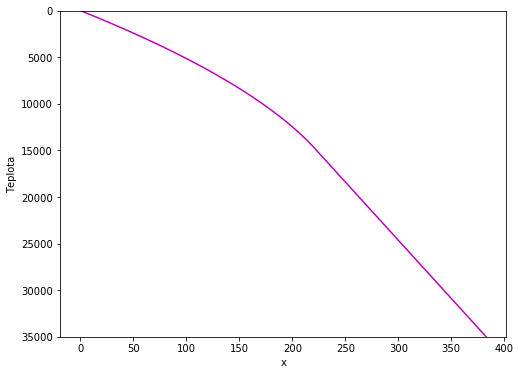

In [13]:
plot(t, x, 'm')
ylim(tc, 0)
xlabel('x')
ylabel('Teplota');

## Variabilní produkce tepla
Výpočet geotermy pro produkci tepla pouze ve spodní kůře (15km)

In [14]:
H = zeros(n-1)
H[xm >= 20000] = 7e-6/3

In [15]:
b = hstack((0, -(H[:-1] + H[1:])*dx**2/2, q*2*dx - H[-1]*dx**2))

In [16]:
t = spsolve(A, b)

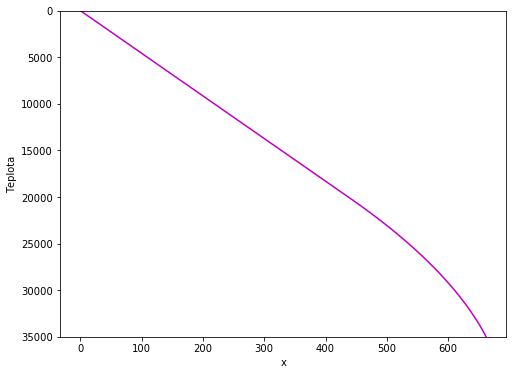

In [17]:
plot(t, x, 'm')
ylim(tc, 0)
xlabel('x')
ylabel('Teplota');

# Úkol na doma
Vypočítejte stabilní geotermu pro teplotně závislou konduktivitu danou vztahem:

$$\lambda=2+\exp \left ( \frac{-T}{1250} \right )+\frac{48}{\exp \left ( \frac{1250-T}{10} \right )}$$

## Řešení

In [18]:
from heatlib_var import *

In [19]:
# reseni s konstatni konduktivitou
m = dict(n=100, k=2.5*np.ones(99), H=1e-6*np.ones(99), tc=35000, T0=0, q=-0.02)
init(m)

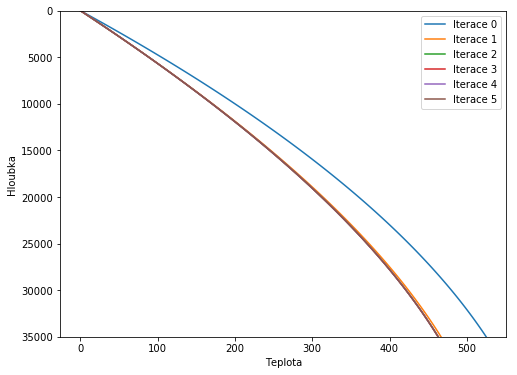

In [20]:
for i in range(5):
    plot(m['t'], m['x'], label='Iterace {}'.format(i))
    # teplota v materialovych uzlech
    tm = (m['t'][1:] + m['t'][:-1]) / 2
    # nova konduktivita
    m['k'] = 2 + exp(-tm/1250) + 48/exp((1250 - tm)/10)
    # prepocitat
    init(m)
plot(m['t'], m['x'], label='Iterace {}'.format(i + 1))
ylim(m['tc'], 0)
xlabel('Teplota')
ylabel('Hloubka')
legend()

Vykreslení vypočtené konduktivity

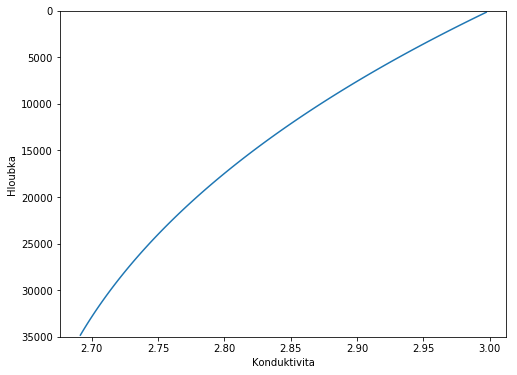

In [21]:
plot(m['k'], m['xm'])
ylim(m['tc'], 0)
xlabel('Konduktivita')
ylabel('Hloubka')